<a href="https://colab.research.google.com/github/msahid-cse/ML_Lab/blob/main/bangladeshi_future_rainfall_prediction_using_rnn_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Input



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML LAB/Project/rainfall_modified_data_bangladesh_1948_to_2014.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20778 entries, 0 to 20777
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Station       20778 non-null  object
 1   Year          20778 non-null  int64 
 2   Month         20778 non-null  int64 
 3   1             20778 non-null  int64 
 4   2             20778 non-null  int64 
 5   3             20778 non-null  int64 
 6   4             20778 non-null  int64 
 7   5             20778 non-null  int64 
 8   6             20778 non-null  int64 
 9   7             20778 non-null  int64 
 10  8             20778 non-null  int64 
 11  9             20778 non-null  int64 
 12  10            20778 non-null  int64 
 13  11            20778 non-null  int64 
 14  12            20778 non-null  int64 
 15  13            20778 non-null  int64 
 16  14            20778 non-null  int64 
 17  15            20778 non-null  int64 
 18  16            20778 non-null  int64 
 19  17  

In [5]:
df.head()

,Station,Year,Month,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,MonthlyTotal
0,Bogra,1948,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bogra,1948,2,0,0,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2,Bogra,1948,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,Bogra,1948,4,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,18,0,110
4,Bogra,1948,5,0,24,0,0,0,0,0,...,7,24,31,14,0,1,8,0,0,297


In [6]:
stations = df.Station.unique()
stations
n_stations = df.Station.nunique()

print(f'There are {n_stations} unique weather sations in this dataset.  There names are: \n {stations}')

There are 35 unique weather sations in this dataset.  There names are: 
 ['Bogra' 'Comilla' "Cox's Bazar" 'Dinajpur' 'Faridpur' 'Jessore' 'Khulna'
 'Mymensingh' 'Satkhira' 'Srimangal' 'Barisal' 'Chittagong' 'M.court'
 'Dhaka' 'Rangpur' 'Sylhet' 'Rangamati' 'Ishurdi' 'Chandpur' 'Rajshahi'
 'Bhola' 'Hatiya' 'Sandwip' 'Feni' 'Patuakhali' 'Khepupara' 'Kutubdia'
 'Madaripur' 'Sitakunda' 'Teknaf' 'Tangail' 'chuadanga' 'Mongla' 'sydpur'
 'Ambagan(Ctg)']


In [7]:
# Process to get date index in required form.
df['Day']  = 1

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

df.set_index('Date', inplace=True)
df = df.drop(['Month', 'Day'], axis =1)
df.head()

,Station,Year,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,MonthlyTotal
Date,,,,,,,,,,,,,,,,,,,,,
1948-01-01,Bogra,1948,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1948-02-01,Bogra,1948,0,0,0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1948-03-01,Bogra,1948,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1948-04-01,Bogra,1948,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,18,0,110
1948-05-01,Bogra,1948,0,24,0,0,0,0,0,0,...,7,24,31,14,0,1,8,0,0,297


In [8]:
df['Monthly Total']  = df.iloc[:, 2:33].sum(axis=1, numeric_only=True)
df.head()

,Station,Year,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,MonthlyTotal,Monthly Total
Date,,,,,,,,,,,,,,,,,,,,,
1948-01-01,Bogra,1948,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1948-02-01,Bogra,1948,0,0,0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,5,5
1948-03-01,Bogra,1948,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
1948-04-01,Bogra,1948,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,18,0,110,110
1948-05-01,Bogra,1948,0,24,0,0,0,0,0,0,...,24,31,14,0,1,8,0,0,297,297


In [9]:
# Remove daily columns and save dataframe separately...in case we want to refer back to source data
df_min = df.drop(df.iloc[:,2:33], axis=1)
df_min

,Station,Year,MonthlyTotal,Monthly Total
Date,,,,
1948-01-01,Bogra,1948,0,0
1948-02-01,Bogra,1948,5,5
1948-03-01,Bogra,1948,3,3
1948-04-01,Bogra,1948,110,110
1948-05-01,Bogra,1948,297,297
...,...,...,...,...
2014-02-01,Teknaf,2014,22,22
2014-03-01,Teknaf,2014,0,0
2014-04-01,Teknaf,2014,1,1


In [10]:
#Using this cell to check logic of pivot table that comes later
#df.loc['1948-04-01']

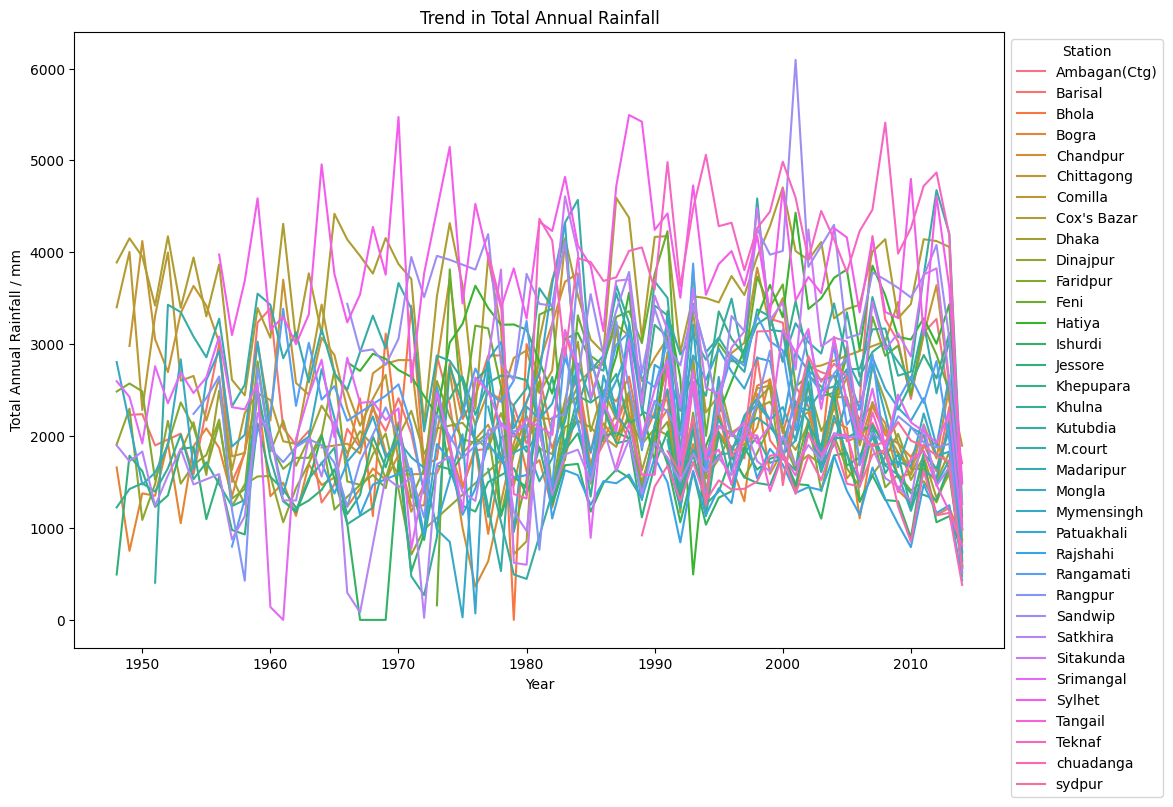

In [11]:
year_total = df_min.groupby(['Station', 'Year']).sum()

plt.figure(figsize = (12,8))
ax = sns.lineplot(data = year_total, x='Year', y='Monthly Total', hue='Station')
ax.set_title('Trend in Total Annual Rainfall')
ax.set_ylabel('Total Annual Rainfall / mm')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [12]:
#year_total.query("`Year` == 2014")

In [13]:
#Drop the now redundant Year column
df_min = df_min.drop('Year', axis=1)
df_min

,Station,MonthlyTotal,Monthly Total
Date,,,
1948-01-01,Bogra,0,0
1948-02-01,Bogra,5,5
1948-03-01,Bogra,3,3
1948-04-01,Bogra,110,110
1948-05-01,Bogra,297,297
...,...,...,...
2014-02-01,Teknaf,22,22
2014-03-01,Teknaf,0,0
2014-04-01,Teknaf,1,1


In [14]:
pivot = pd.pivot_table(data = df_min, values = ['Monthly Total'], columns = ['Station'], fill_value=0,
              index=['Date'])
pivot.head()

Monthly Total                                                   \
Station     Ambagan(Ctg) Barisal Bhola  Bogra Chandpur Chittagong Comilla   
Date                                                                        
1948-01-01           0.0     0.0   0.0    0.0      0.0        0.0     0.0   
1948-02-01           0.0     0.0   0.0    5.0      0.0        0.0   194.0   
1948-03-01           0.0     0.0   0.0    3.0      0.0        0.0    43.0   
1948-04-01           0.0     0.0   0.0  110.0      0.0        0.0   293.0   
1948-05-01           0.0     0.0   0.0  297.0      0.0        0.0   240.0   

                                       ...                                     \
Station    Cox's Bazar Dhaka Dinajpur  ... Rangpur Sandwip Satkhira Sitakunda   
Date                                   ...                                      
1948-01-01         3.0   0.0      0.0  ...     0.0     0.0     41.0       0.0   
1948-02-01         0.0   0.0      0.0  ...     0.0     0.0    143.0       0.0   
1948-03-01         0.0   0.0      0.0  ...     0.0     0.0     48.0       0.0   
1948-04-01       200.0   0.0     71.0  ...     0.0     0.0     60.0       0.0   
1948-05-01       424.0   0.0    244.0  ...     0.0     0.0    106.0       0.0   

                                                             
Station    Srimangal Sylhet Tangail Teknaf chuadanga sydpur  
Date                                                         
1948-01-01       0.0    0.0     0.0    0.0       0.0    0.0  
1948-02-01     140.0    0.0     0.0    0.0       0.0    0.0  
1948-03-01      51.0    0.0     0.0    0.0       0.0    0.0  
1948-04-01     442.0    0.0     0.0    0.0       0.0    0.0  
1948-05-01     666.0    0.0     0.0    0.0       0.0    0.0  

[5 rows x 35 columns]

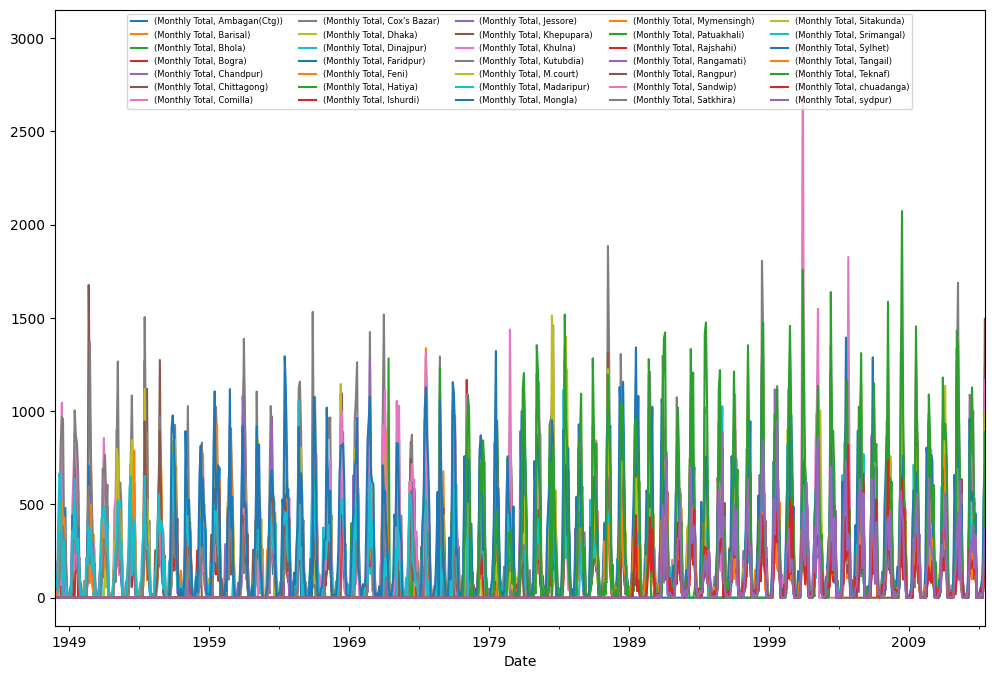

In [15]:
pivot.plot(figsize = (12,8)).legend(loc='upper center', ncols=5, fontsize=6, draggable=True)

(360.0, 431.0)

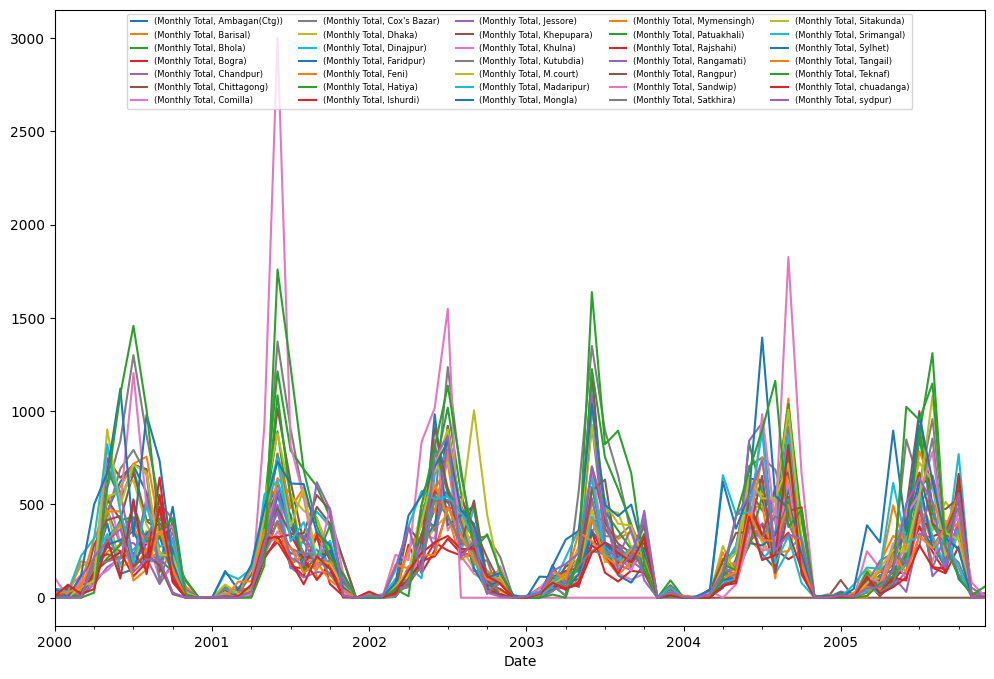

In [16]:
#Zooming into a small section of the chart:
pivot.plot(figsize = (12,8)).legend(loc='upper center', ncols=5, fontsize=6, draggable=True)
plt.xlim('2000-01-01','2005-12-01')

# another Data

In [17]:
#Taking location data from a second Bangladeshi weather dataset
locations = pd.read_csv('/content/drive/MyDrive/ML LAB/Project/65 Years of Weather Data Bangladesh (1948 - 2013).csv')

In [18]:
locations.head()

,Unnamed: 0,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [19]:
# Removing the parameters that we are not interested in, to save memory space
locations = locations.drop(['Unnamed: 0', 'YEAR', 'Month', 'Max Temp', 'Min Temp',
       'Rainfall', 'Relative Humidity', 'Wind Speed', 'Cloud Coverage',
       'Bright Sunshine', 'Period'], axis=1)

locations.head()

,Station Names,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT
0,Barisal,41950,536809.8,510151.9,22.7,90.36,4
1,Barisal,41950,536809.8,510151.9,22.7,90.36,4
2,Barisal,41950,536809.8,510151.9,22.7,90.36,4
3,Barisal,41950,536809.8,510151.9,22.7,90.36,4
4,Barisal,41950,536809.8,510151.9,22.7,90.36,4


In [20]:
locations['Station Names'].unique()

array(['Barisal', 'Bhola', 'Bogra', 'Chandpur',
       'Chittagong (City-Ambagan)', 'Chittagong (IAP-Patenga)',
       'Chuadanga', 'Comilla', "Cox's Bazar", 'Dhaka', 'Dinajpur',
       'Faridpur', 'Feni', 'Hatiya', 'Ishurdi', 'Jessore', 'Khepupara',
       'Khulna', 'Kutubdia', 'Madaripur', 'Maijdee Court', 'Mongla',
       'Mymensingh', 'Patuakhali', 'Rajshahi', 'Rangamati', 'Rangpur',
       'Sandwip', 'Satkhira', 'Sitakunda', 'Srimangal', 'Syedpur',
       'Sylhet', 'Tangail', 'Teknaf'], dtype=object)

In [21]:
df['Station'].unique()

array(['Bogra', 'Comilla', "Cox's Bazar", 'Dinajpur', 'Faridpur',
       'Jessore', 'Khulna', 'Mymensingh', 'Satkhira', 'Srimangal',
       'Barisal', 'Chittagong', 'M.court', 'Dhaka', 'Rangpur', 'Sylhet',
       'Rangamati', 'Ishurdi', 'Chandpur', 'Rajshahi', 'Bhola', 'Hatiya',
       'Sandwip', 'Feni', 'Patuakhali', 'Khepupara', 'Kutubdia',
       'Madaripur', 'Sitakunda', 'Teknaf', 'Tangail', 'chuadanga',
       'Mongla', 'sydpur', 'Ambagan(Ctg)'], dtype=object)

In [22]:
#Comparing station names and correcting to ensure a clean merge

pivot = pivot.rename({'sydpur':'Syedpur', 'chuadanga':'Chuadanga', 'M.court': 'Maijdee Court',
         'Chittagong':'Chittagong (IAP-Patenga)', 'Ambagan(Ctg)':'Chittagong (City-Ambagan)'} )

df_min = df_min.rename({'sydpur':'Syedpur', 'chuadanga':'Chuadanga', 'M.court': 'Maijdee Court',
         'Chittagong':'Chittagong (IAP-Patenga)', 'Ambagan(Ctg)':'Chittagong (City-Ambagan)'} )


In [23]:
locations = locations.rename(columns = {'Station Names':'Station'})
locations.set_index('Station', inplace=True)
locations.drop_duplicates(inplace=True)
locations.head()

,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT
Station,,,,,,
Barisal,41950,536809.8,510151.9,22.70,90.3600,4
Bhola,41951,567637.6,510271.8,22.70,90.6600,5
Bogra,41883,435303.7,751187.5,24.88,89.3600,20
Chandpur,41941,568556.9,571945.8,23.26,90.6700,7
Chittagong (City-Ambagan),41977,0.0,0.0,22.35,91.8166,0


In [24]:
#Merging the lacation data with our cut down dataframe,
df2 = pd.merge(df_min, locations, on="Station")
df2.head()

,Station,MonthlyTotal,Monthly Total,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT
0,Bogra,0,0,41883,435303.7,751187.5,24.88,89.36,20
1,Bogra,5,5,41883,435303.7,751187.5,24.88,89.36,20
2,Bogra,3,3,41883,435303.7,751187.5,24.88,89.36,20
3,Bogra,110,110,41883,435303.7,751187.5,24.88,89.36,20
4,Bogra,297,297,41883,435303.7,751187.5,24.88,89.36,20


In [25]:
low_lying = list(df2.query('ALT<5')['Station'].unique())
print(f'The stations which lie at or below 5m altitude are: \n {low_lying}, \n we shall use only these in the model')

The stations which lie at or below 5m altitude are: 
 ["Cox's Bazar", 'Khulna', 'Barisal', 'Hatiya', 'Patuakhali', 'Khepupara', 'Sitakunda', 'Teknaf', 'Mongla'], 
 we shall use only these in the model


In [26]:
low_areas = pivot['Monthly Total'][["Cox's Bazar", 'Khulna', 'Barisal', 'Hatiya', 'Patuakhali', 'Khepupara', 'Sitakunda', 'Teknaf', 'Mongla']]
low_areas = low_areas.iloc[530:]

In [27]:
# What is the length of the dataset, and how many months should we use for the sequence length?
# We note that we have 12 readings per year for our weather stations.
len(low_areas)

268

In [28]:
# Let's use 24 months worth of data for our test set, this is about 10%
test_size = 24

train = low_areas.iloc[:-test_size]
test = low_areas.iloc[-test_size: ]

In [29]:
# Scaling the data:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Introducing the Time Series Generator

In [30]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Let's define length to get 18 months back and then predict the next month out
length = 18
batch_size=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

## Defining the Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [32]:

# Number of features
n_features = len(low_areas.columns)

# Define model
model = Sequential()

# First LSTM layer
model.add(LSTM(500, activation='tanh', return_sequences=True,
               input_shape=(length, scaled_train.shape[1])))
model.add(Dropout(0.3))  # Prevent overfitting

# Second LSTM layer
model.add(LSTM(300, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(100, activation='tanh'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(scaled_train.shape[1], activation='linear'))  # No activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mse')



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 18, 500)        │     1,020,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18, 500)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 18, 300)        │       961,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 300)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │           909 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,142,509 (8.17 MB)

 Trainable params: 2,142,509 (8.17 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 18, 500)        │     1,020,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18, 500)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 18, 300)        │       961,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 300)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │           909 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,142,509 (8.17 MB)

 Trainable params: 2,142,509 (8.17 MB)

 Non-trainable params: 0 (0.00 B)

## Early Stopping

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                           length=length, batch_size=batch_size)

# Fit Model and Analyse

In [ ]:
model.fit(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


226/226 ━━━━━━━━━━━━━━━━━━━━ 33s 125ms/step - loss: 0.0594 - val_loss: 0.0280
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 26s 115ms/step - loss: 0.0467 - val_loss: 0.0340
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 30s 135ms/step - loss: 0.0271 - val_loss: 0.0160
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 27s 118ms/step - loss: 0.0253 - val_loss: 0.0118
Epoch 5/10
 78/226 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.0185

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
first_eval_batch = scaled_train[-length:]
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))
model.predict(first_eval_batch)

In [ ]:
# Checking dimensions of test and prediction arrays
scaled_test[0]

In [ ]:
# Loop through the end of the training data and use the model to predict data to compare with the test data

n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
# Viewing the test predictions, just to check the shape of the array and size of its entries
#test_predictions

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

pred_index = pd.date_range(start = '2012-07-01', end = '2014-06-01', periods = 24)
#pred_index

true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

true_predictions['Date'] = pred_index
true_predictions.set_index('Date', inplace=True)
true_predictions.head()

## Qualitative Analysis of RNN Model

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
#fig.suptitle('Comparison of Data and Predictions')
ax1.plot(true_predictions)
ax1.set_title('Predicted Monthly Rainfall')
ax2.plot(test)
ax2.set_title('Measured Monthly Rainfall')

plt.legend([ax1, ax2], labels=low_areas)

plt.tight_layout()
plt.show()

## Quantitative Analysis of RNN Model

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
stations = test.columns

RMSE_list = []

for col in stations:
    rmse = np.round(np.sqrt(mean_squared_error(test[col], true_predictions[col])),2)
    RMSE_list.append(rmse)

print(RMSE_list)

In [ ]:
dict = {'Station':stations, 'RMSE': RMSE_list}
results = pd.DataFrame(dict)
#results

In [ ]:
max_values = []
max_pred = []

for col in stations:
    max_t = test[col].max()
    max_p = np.round(true_predictions[col].max(),2)
    max_values.append(max_t)
    max_pred.append(max_p)

print(max_values, max_pred)

In [ ]:
total_rain = []
total_pred = []

for col in stations:
    total = test.iloc[9:15][col].sum()
    total_p = np.round(true_predictions.iloc[9:15][col].sum(),2)
    total_rain.append(total)
    total_pred.append(total_p)

print(total_rain, total_pred)

In [ ]:
results['Max Rainfall'] = max_values
results['Max Predicted'] = max_pred
results['Total Apr-Oct Rainfall'] = total_rain
results['Predicted Apr-Oct Rainfall'] = total_pred
results['Error in Total'] = results['Total Apr-Oct Rainfall'] - results['Predicted Apr-Oct Rainfall']
results

In [ ]:
# We shall use this measurand to optimise the model
main_measurand = results['RMSE'].mean()
main_measurand

In [ ]:
pivot.reset_index(inplace=True)
july = pivot[pivot['Date'].dt.month == 7]
july['Monthly Total']["Cox's Bazar"].plot(kind='hist', bins=30,
                                          title = "Frequency Distribution of July Rainfall for Cox's Bazar")

In [ ]:
# Reminding ourself of the nature of the data:
low_areas

In [ ]:
# Scaling the data as beforee:

full_scaler = MinMaxScaler()
full_scaler.fit(low_areas)
scaled_low_areas = scaler.transform(low_areas)

In [ ]:
# As before, we shall define length to get 18 months back and then predict the next month out
length = 18
batch_size=1
generator = TimeseriesGenerator(scaled_low_areas, scaled_low_areas, length=length,
                                batch_size=batch_size)

In [ ]:
#No test data to evaluate against any longer...but we shall monitor the loss for early stopping
early_stop = EarlyStopping(monitor='loss',patience=2)

model.fit(generator,epochs=10, callbacks=[early_stop])

In [ ]:
forecast_losses = pd.DataFrame(model.history.history)
forecast_losses.plot()

In [ ]:
first_eval_batch = scaled_train[-length:]
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))
model.predict(first_eval_batch)

In [ ]:
# Loop through the end of the training data and use the model to predict data to compare with the test data

n_features = scaled_low_areas.shape[1]
forecast = []

first_eval_batch = scaled_low_areas[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_forecast = scaler.inverse_transform(forecast)

pred_index = pd.date_range(start = '2025-07-01', end = '2026-12-01', periods = 24)
#pred_index

true_forecast = pd.DataFrame(data=true_forecast,columns=test.columns)

true_forecast['Date'] = pred_index
true_forecast.set_index('Date', inplace=True)
true_forecast.head()

In [ ]:
true_forecast.plot(figsize=(12,8), title='Monthly Rainfall Forecast for 2025 and 2026')